In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# store map size (pixels)
STORE_SIZE = [3136, 2475] 

TRANSFORMED_DATA_103_PATH = "results/trajectories/transformed_coords_1.03.csv"
TRANSFORMED_DATA_104_PATH = "results/trajectories/transformed_coords_1.04.csv"
TRANSFORMED_DATA_105_PATH = "results/trajectories/transformed_coords_1.05.csv"
TRANSFORMED_DATA_205_PATH = "results/trajectories/transformed_coords_2.05.csv"
TRANSFORMED_DATA_PATH = "results/trajectories/transformed_coords.csv"
TRANSFORMED_DATA_SELECT_CAMS_PATH = "C:/Users/diogo/Desktop/Tese/Resultados/transformed_coords_selected_cameras.csv"
MAP_PATH = "C:/Users/diogo/Desktop/Tese/Dados/floorplan.png"
COLOR_PER_CAMERA = {"1.03": "Greys", "1.04": "Greens", "1.05": "Oranges", "2.05": "Blues", "2.11": "RdPu"}

In [9]:
df_103 = pd.read_csv(TRANSFORMED_DATA_103_PATH, index_col=None, header=0)
df_104 = pd.read_csv(TRANSFORMED_DATA_104_PATH, index_col=None, header=0)
df_105 = pd.read_csv(TRANSFORMED_DATA_105_PATH, index_col=None, header=0)
df_205 = pd.read_csv(TRANSFORMED_DATA_205_PATH, index_col=None, header=0)
df_all = pd.read_csv(TRANSFORMED_DATA_PATH, index_col=None, header=0)
df_103.head()

video_name  frame_id        xmin        ymin        xmax  \
0  20220314_1.03_10_0_blurred       258  653.596516  233.180269  732.845525   
1  20220314_1.03_10_0_blurred       260  653.706260  233.044283  732.741128   
2  20220314_1.03_10_0_blurred       261  653.599622  233.117391  731.924925   
3  20220314_1.03_10_0_blurred       264  653.864126  233.172724  732.331825   
4  20220314_1.03_10_0_blurred       285  653.823460  232.950344  732.490189   

         ymax  velocity  customer_id  x_floorplan  y_floorplan  \
0  330.121294     0.000         2383  -359.594824   -48.170086   
1  329.715728     0.105         2383  -359.589552   -48.161038   
2  328.843053     0.185         2383  -359.588172   -48.152324   
3  329.024946     0.128         2383  -359.587332   -48.155114   
4  329.088096     0.119         2383  -359.586592   -48.153137   

   new_customer_id  camera  x_floorplan_new  y_floorplan_new      time  
0          1002383    1.03      1226.894568      1430.999265  14:47:33  
1          1002383    1.03      1227.066483      1431.227170  14:47:33  
2          1002383    1.03      1227.111485      1431.446655  14:47:33  
3          1002383    1.03      1227.138867      1431.376397  14:47:34  
4          1002383    1.03      1227.163013      1431.426174  14:47:37

In [20]:
def get_data_by_customer(df, customer_id):
    return df.loc[df["new_customer_id"] == customer_id]

def get_data_by_customer_and_camera(df, customer_id, camera):
    return df.loc[df["new_customer_id"] == customer_id].loc[df["camera"] == camera]

def get_data_by_time(df, begin_time, end_time):
    return df.loc[(df["time"] > begin_time) & (df["time"] < end_time)]

def count_different_customers(df):
    return df.new_customer_id.unique().size

def get_time_interval(df):
    min_time = df["time"].min()
    max_time = df["time"].max()
    return (min_time, max_time)

def get_color(camera, i, length):
    palette = sns.color_palette(COLOR_PER_CAMERA[camera], 3)
    if i < (length / 3):
        return palette[0]
    elif i < ((2*length) / 3):
        return palette[1]
    else:
        return palette[2]

def print_trajectory_chronologically(df):
    img = plt.imread(MAP_PATH)
    fig, ax = plt.subplots()
    fig.set_dpi(1200)
    ax.imshow(img, extent=[0, STORE_SIZE[0], 0, STORE_SIZE[1]])

    pd.to_datetime(df["time"], format="%H:%M:%S")
    df_chrono = df.sort_values(["time"])

    for camera in df_chrono["camera"].unique():
        camera_list = df_chrono.loc[df_chrono.camera == camera].values.tolist()
        for i in range(len(camera_list)):
            proj_color = get_color(str(camera), i, len(camera_list))
            print("video name: " + str(camera_list[i][0]) + "time: " + str(camera_list[i][14]) + " bbox coords: (" + str(camera_list[i][2]) + " " + str(camera_list[i][3]) + " " + str(camera_list[i][4]) + " " + 
                  str(camera_list[i][5]) + ") camera: " + str(camera_list[i][11]) + " new_customer_id: " + str(camera_list[i][10]))
            plt.scatter(camera_list[i][12], camera_list[i][13], marker=".", s=1, lw=0, color=proj_color)
        
    plt.show()


def print_coordinate(x_coord, y_coord):
    img = plt.imread(MAP_PATH)
    fig, ax = plt.subplots()
    fig.set_dpi(1200)
    ax.imshow(img, extent=[0, STORE_SIZE[0], 0, STORE_SIZE[1]])
    plt.scatter(x_coord, y_coord, marker=".", s=1, lw=0, color="red")
    plt.show()


def print_trajectory_by_client(df):
    img = plt.imread(MAP_PATH)
    fig, ax = plt.subplots()
    fig.set_dpi(1200)
    ax.imshow(img, extent=[0, STORE_SIZE[0], 0, STORE_SIZE[1]])

    counter = 0
    color_palette = sns.color_palette("Paired", len(df["new_customer_id"].unique()))
    for customer in df["new_customer_id"].unique():
        plt.scatter(df.loc[df.new_customer_id == customer, "x_floorplan_new"], df.loc[df.new_customer_id == customer, "y_floorplan_new"], marker=".", s=1, lw=0, color=color_palette[counter])
        counter+=1
        
    plt.show()

### Main - 1.03


3
video name: 20220314_1.03_12_16_blurredtime: 16:30:31 bbox coords: (160.75442282890123 363.48679974567045 240.5130851240565 464.5173730349241) camera: 1.03 new_customer_id: 12161188
video name: 20220314_1.03_12_16_blurredtime: 16:30:31 bbox coords: (232.710211307706 338.4643293004518 311.90546118775444 437.3011442094935) camera: 1.03 new_customer_id: 12161191
video name: 20220314_1.03_12_16_blurredtime: 16:30:31 bbox coords: (653.2590614096206 231.88261321454985 732.4654379826696 330.0062340897153) camera: 1.03 new_customer_id: 12161192
video name: 20220314_1.03_12_16_blurredtime: 16:30:31 bbox coords: (157.15653075838387 359.08668581331807 237.7918732239544 461.47544619988014) camera: 1.03 new_customer_id: 12161188
video name: 20220314_1.03_12_16_blurredtime: 16:30:31 bbox coords: (237.24076448974543 342.35266080448207 308.6478916584029 433.1473190459917) camera: 1.03 new_customer_id: 12161191
video name: 20220314_1.03_12_16_blurredtime: 16:30:31 bbox coords: (151.64007460576676 354

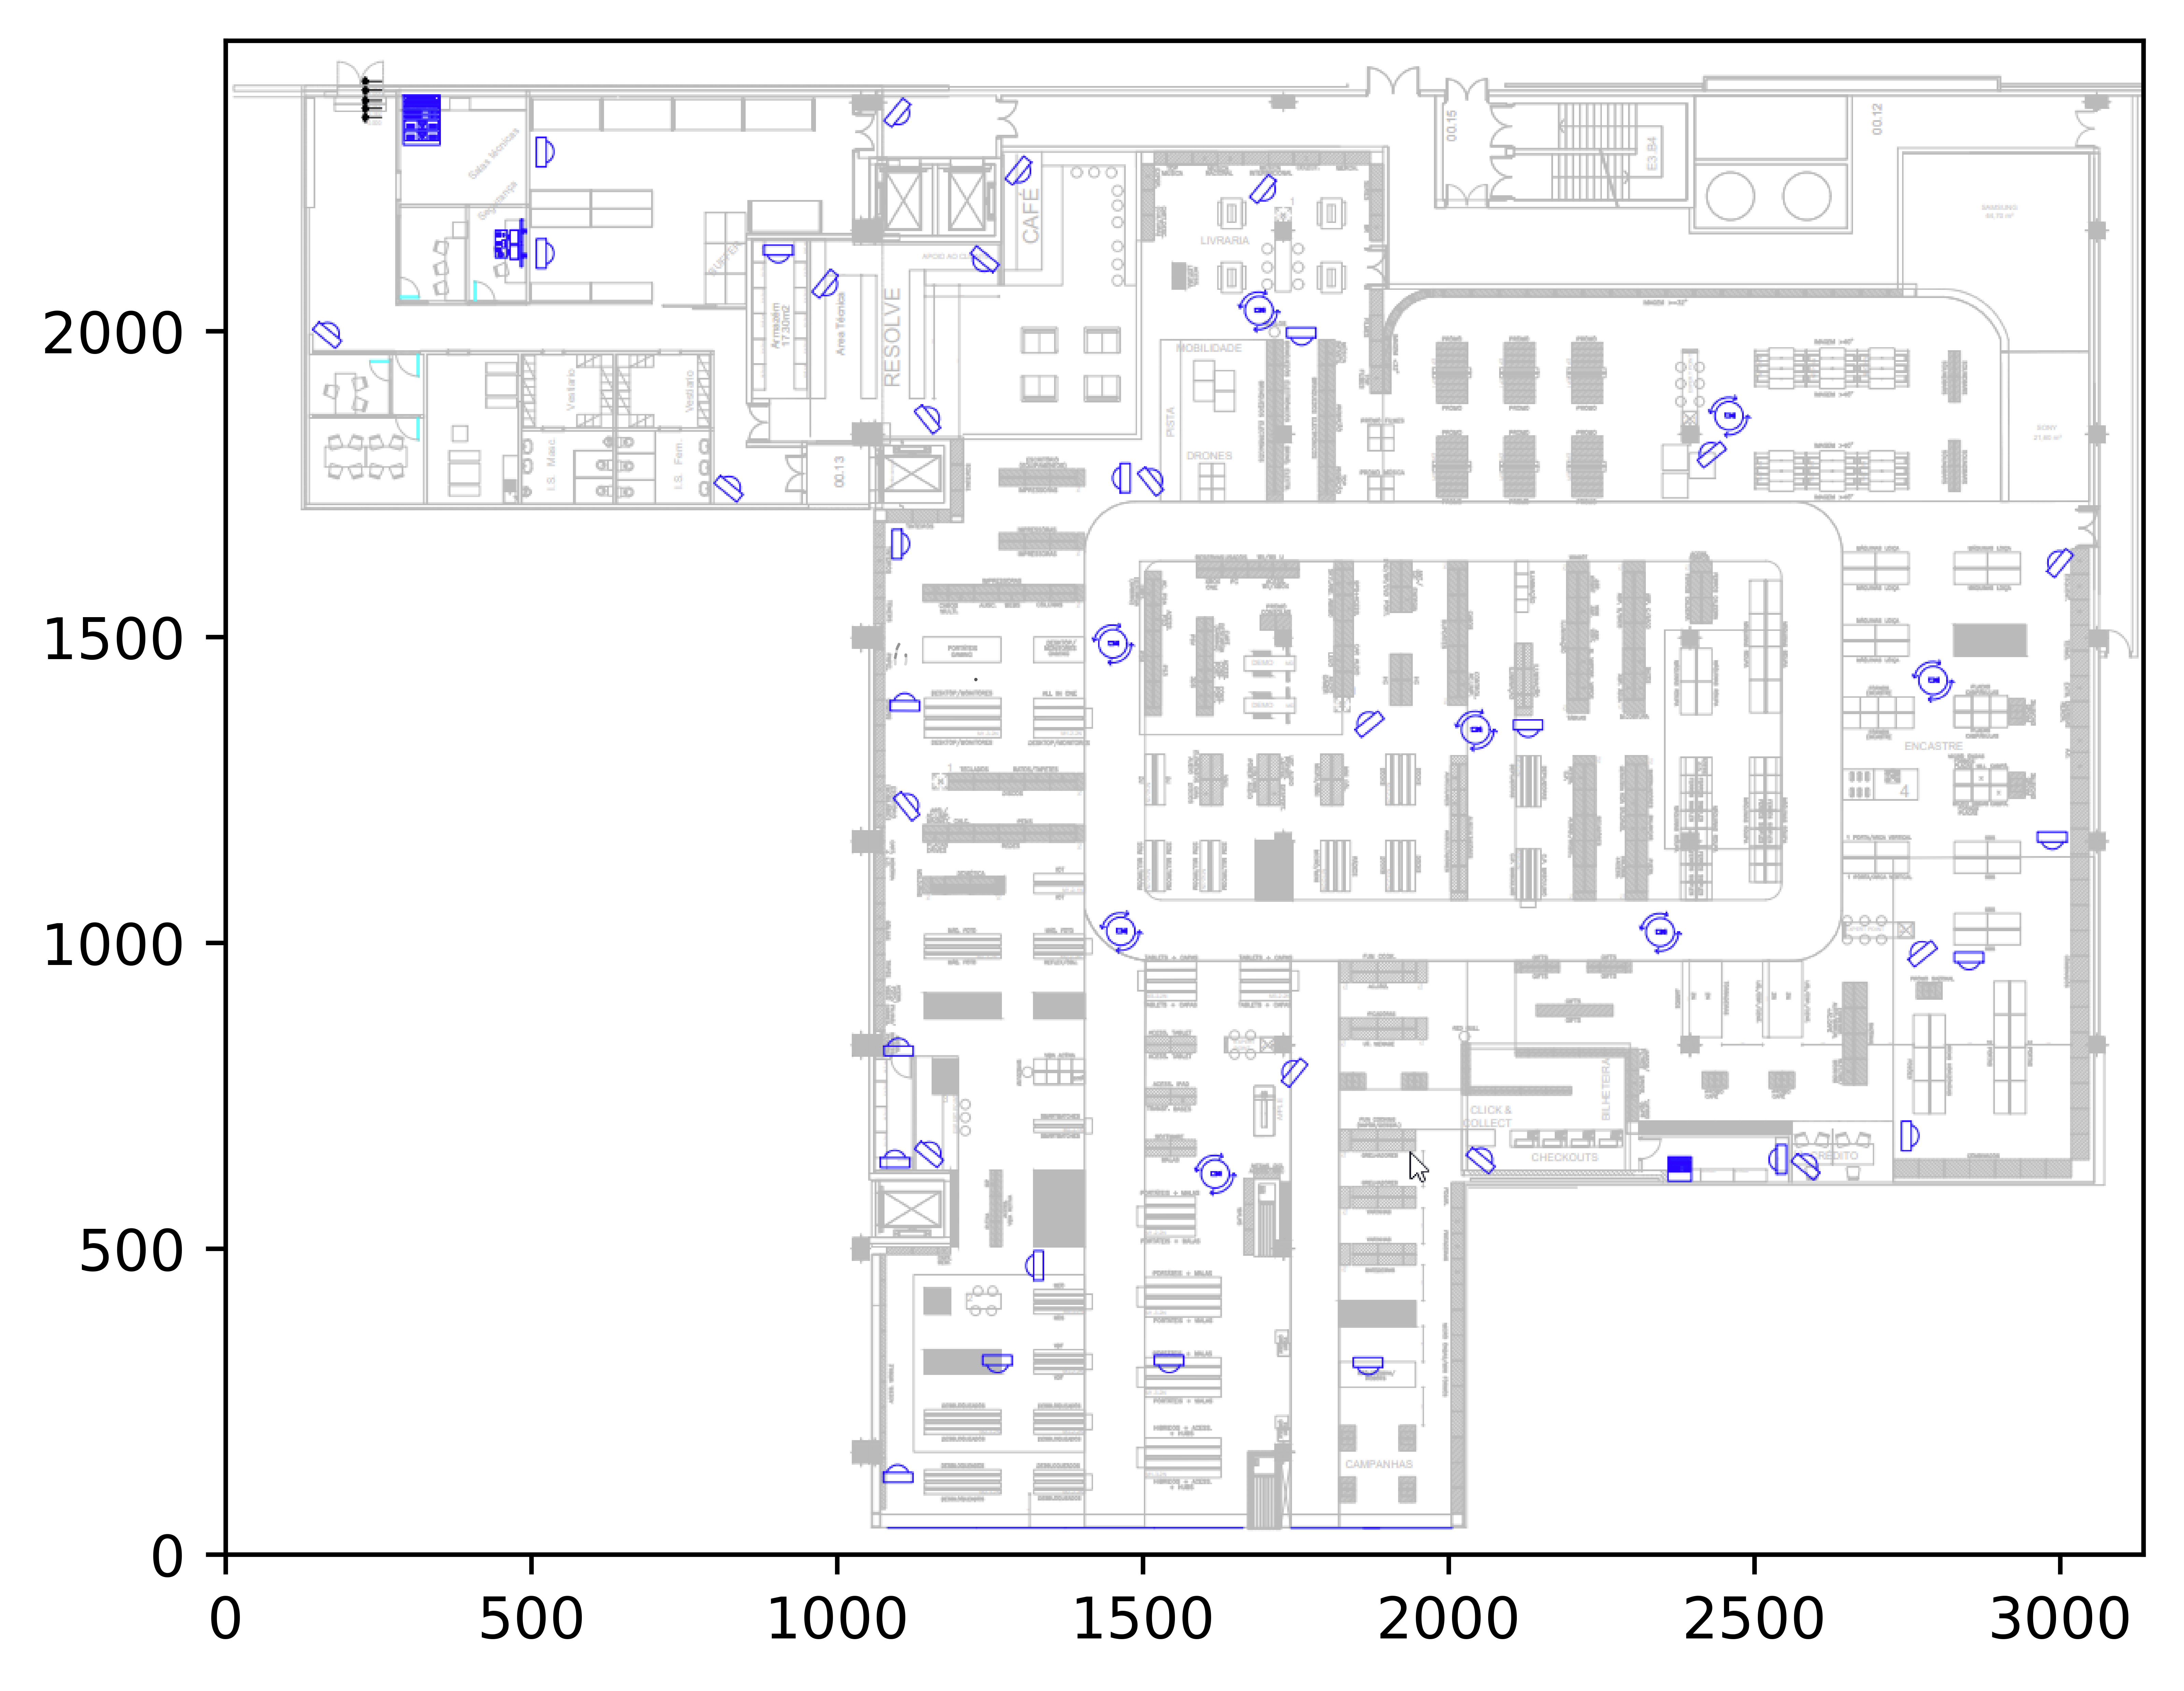

In [11]:
data_by_time = get_data_by_time(df_103, "16:30:30", "16:30:40")
#data_by_customer = get_data_by_customer(df_103, 1.0)
print(count_different_customers(data_by_time))
print_trajectory_chronologically(data_by_time)

1
video name: 20220314_1.04_5_6_blurredtime: 16:30:31 bbox coords: (276.19510006458654 369.6239776611328 406.34420657603846 613.5904022216797) camera: 1.04 new_customer_id: 561542
video name: 20220314_1.04_5_6_blurredtime: 16:30:32 bbox coords: (263.865459325365 350.4780229748559 407.5805530263206 619.8562738822623) camera: 1.04 new_customer_id: 561542
video name: 20220314_1.04_5_6_blurredtime: 16:30:32 bbox coords: (288.84914764213136 418.22406061393065 380.2494755137184 585.2946657837601) camera: 1.04 new_customer_id: 561542
video name: 20220314_1.04_5_6_blurredtime: 16:30:32 bbox coords: (284.8405793527708 438.5418280660105 355.1237429766041 565.9252491987644) camera: 1.04 new_customer_id: 561542
video name: 20220314_1.04_5_6_blurredtime: 16:30:33 bbox coords: (269.242614585975 391.3965588649815 344.1928533679865 524.632584393114) camera: 1.04 new_customer_id: 561542
video name: 20220314_1.04_5_6_blurredtime: 16:30:33 bbox coords: (261.75406245748115 378.4877342965282 341.9018388334

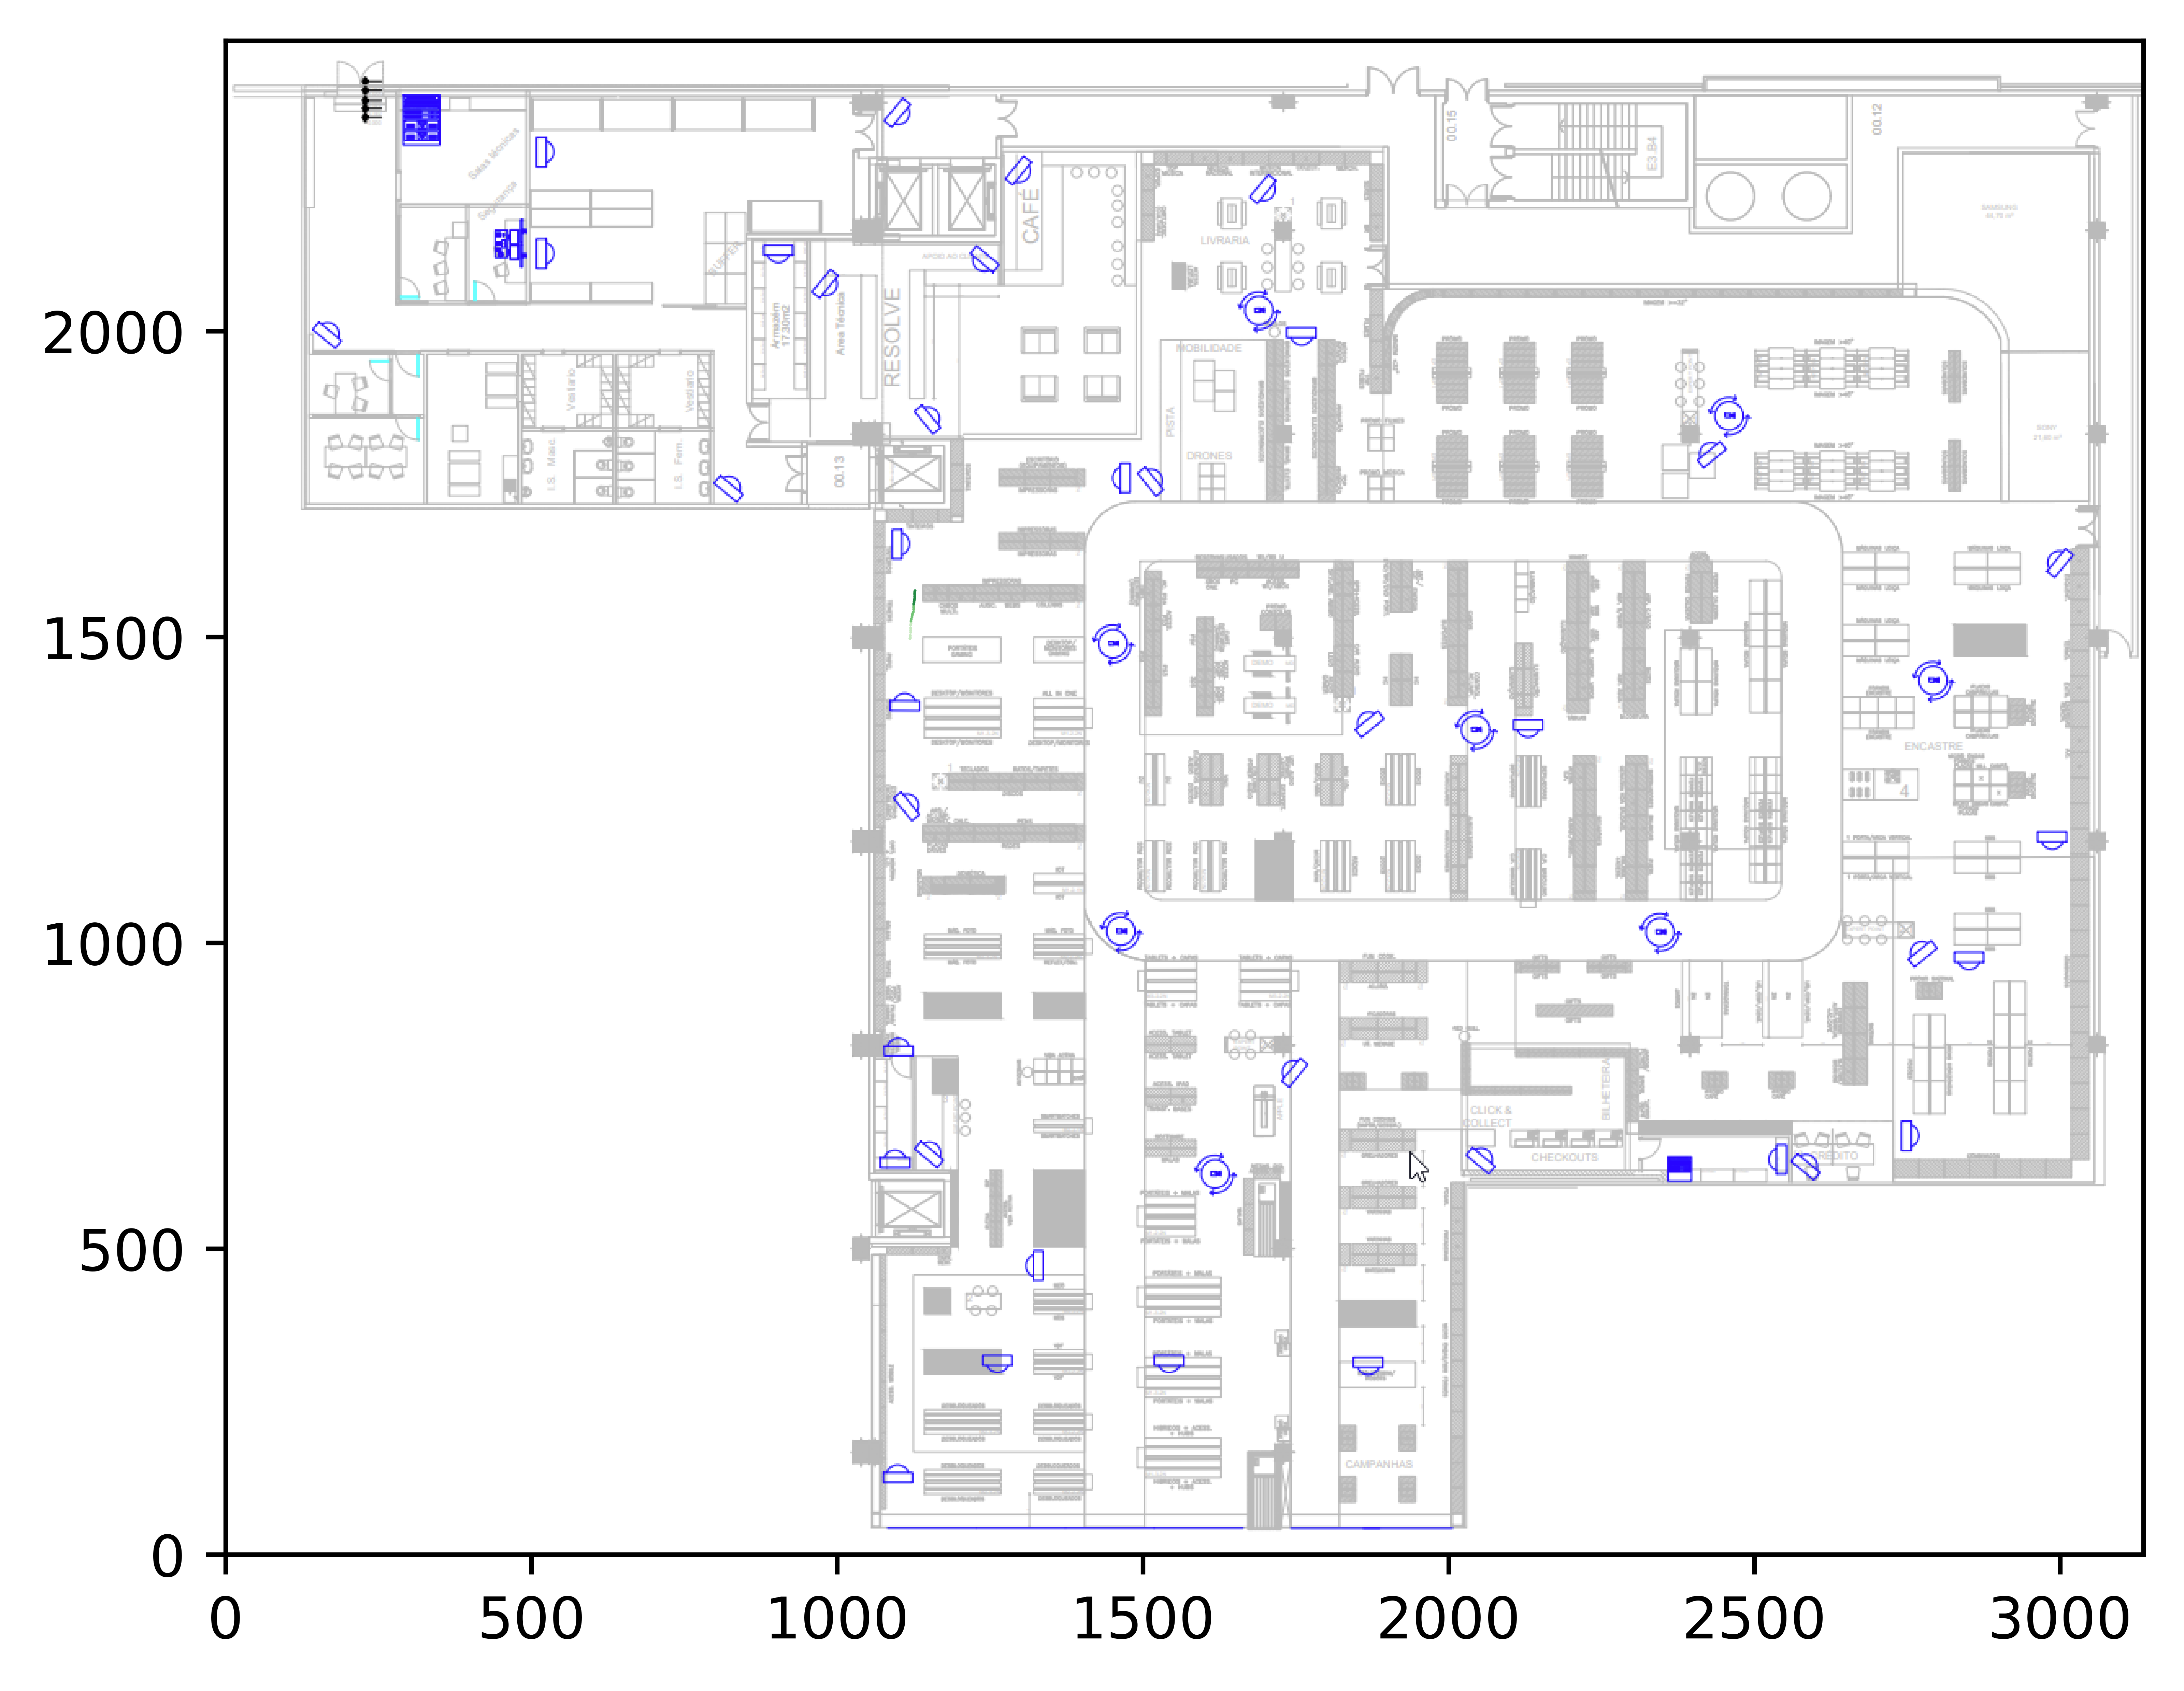

In [26]:
#data_by_time = get_data_by_time(df_104, "16:30:28", "16:30:40")
data_by_customer = get_data_by_customer(df_104, 561542)
print(count_different_customers(data_by_customer))
print_trajectory_chronologically(data_by_customer)

4
video name: 20220314_1.05_5_5_blurredtime: 16:30:36 bbox coords: (593.7695632211063 649.2308837890624 674.4094406851437 718.9142822265625) camera: 1.05 new_customer_id: 55809
video name: 20220314_1.05_5_5_blurredtime: 16:30:36 bbox coords: (391.2541691966313 495.3862670898437 684.2844538502437 719.0666870117187) camera: 1.05 new_customer_id: 55810
video name: 20220314_1.05_5_5_blurredtime: 16:30:36 bbox coords: (368.46373137156434 461.94841323718856 702.1231660221904 719.4456792483961) camera: 1.05 new_customer_id: 55810
video name: 20220314_1.05_5_5_blurredtime: 16:30:37 bbox coords: (418.1188428625832 501.80375175855033 661.6946661631555 691.1754105475218) camera: 1.05 new_customer_id: 55810
video name: 20220314_1.05_5_5_blurredtime: 16:30:37 bbox coords: (376.6709702983222 586.19443359375 540.5954847798027 719.83037109375) camera: 1.05 new_customer_id: 55811
video name: 20220314_1.05_5_5_blurredtime: 16:30:37 bbox coords: (360.01414676784657 550.4031121133695 565.764455495414 719.

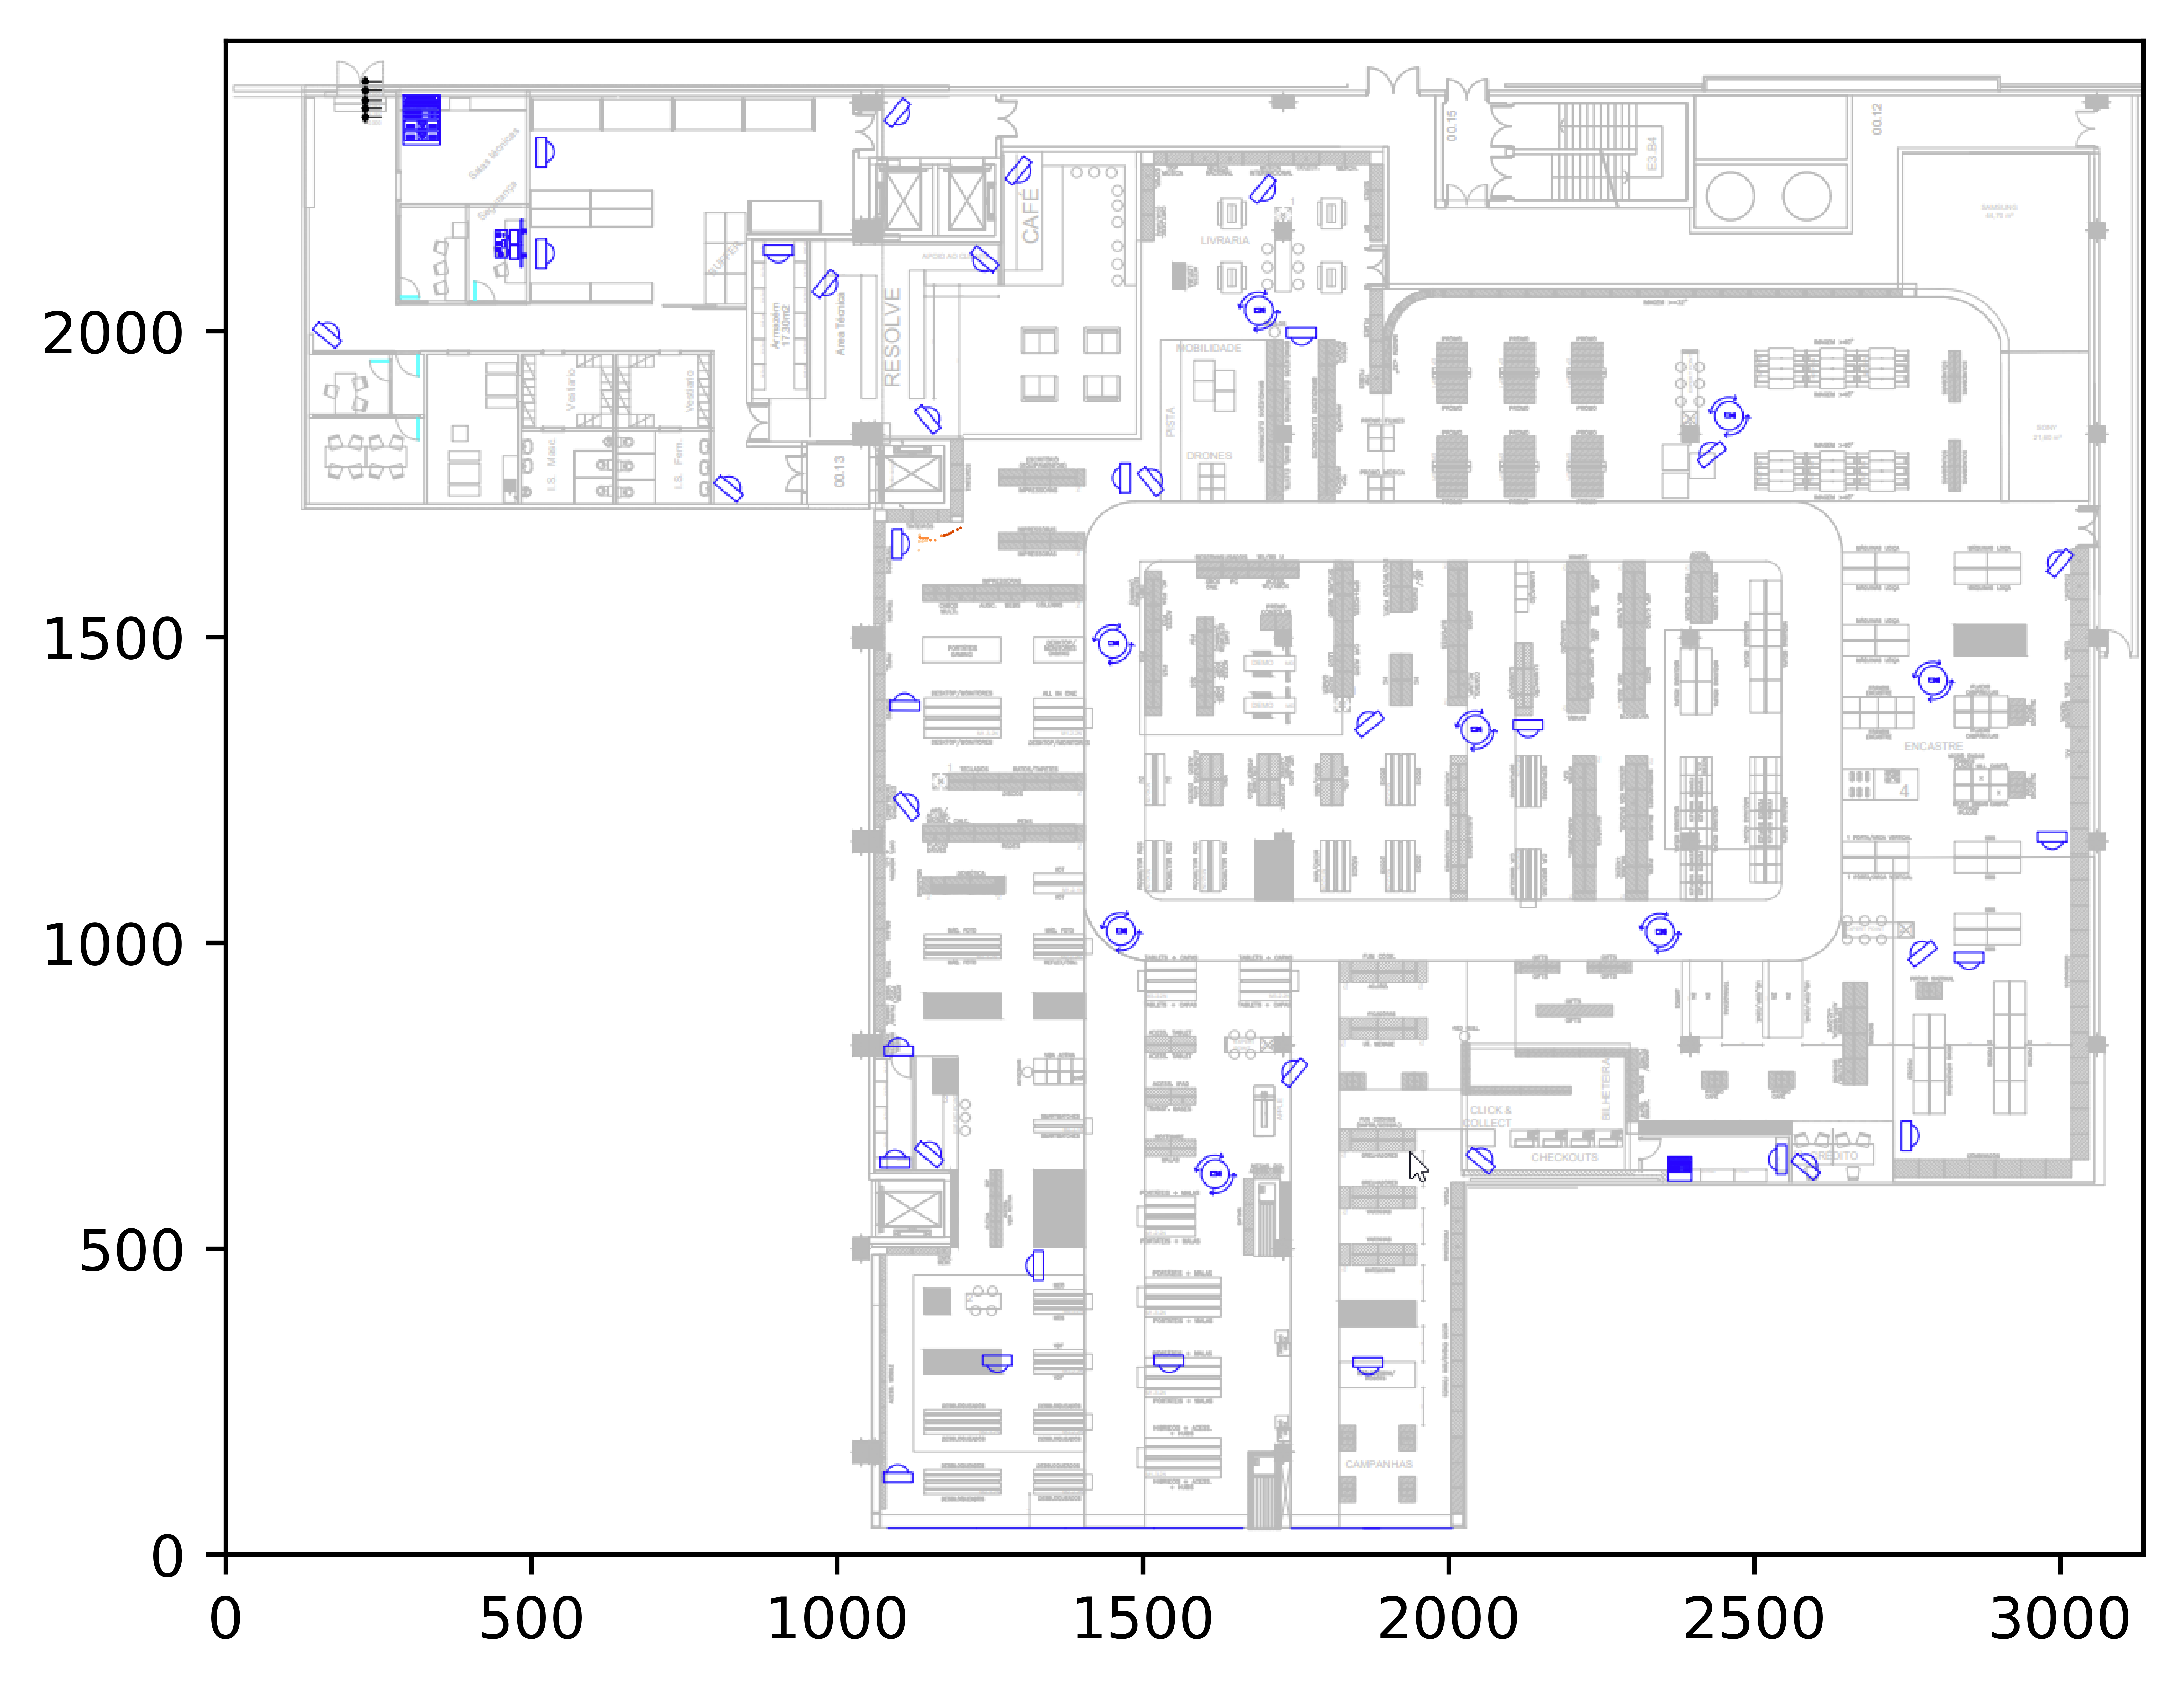

In [13]:
data_by_time = get_data_by_time(df_105, "16:30:27", "16:30:55")
#data_by_customer = get_data_by_customer(df, 1)
print(count_different_customers(data_by_time))
print_trajectory_chronologically(data_by_time)

6
video name: 20220314_2.05_4_51_blurredtime: 16:30:28 bbox coords: (338.1564563427612 76.35151788176182 363.8951437003626 150.81521244999522) camera: 2.05 new_customer_id: 4511692
video name: 20220314_2.05_4_51_blurredtime: 16:30:28 bbox coords: (338.1429368522225 76.1653133586043 363.9230915163234 150.81593277963412) camera: 2.05 new_customer_id: 4511692
video name: 20220314_2.05_4_51_blurredtime: 16:30:28 bbox coords: (338.1424698873461 76.08571165409366 363.9330552353455 150.835614006357) camera: 2.05 new_customer_id: 4511692
video name: 20220314_2.05_4_51_blurredtime: 16:30:28 bbox coords: (338.15299583097686 76.06630702880128 363.93120818464257 150.8432922674001) camera: 2.05 new_customer_id: 4511692
video name: 20220314_2.05_4_51_blurredtime: 16:30:28 bbox coords: (338.1621512665399 76.04860196344475 363.925677774604 150.85042391630776) camera: 2.05 new_customer_id: 4511692
video name: 20220314_2.05_4_51_blurredtime: 16:30:28 bbox coords: (336.7773855907129 74.96644889883194 363

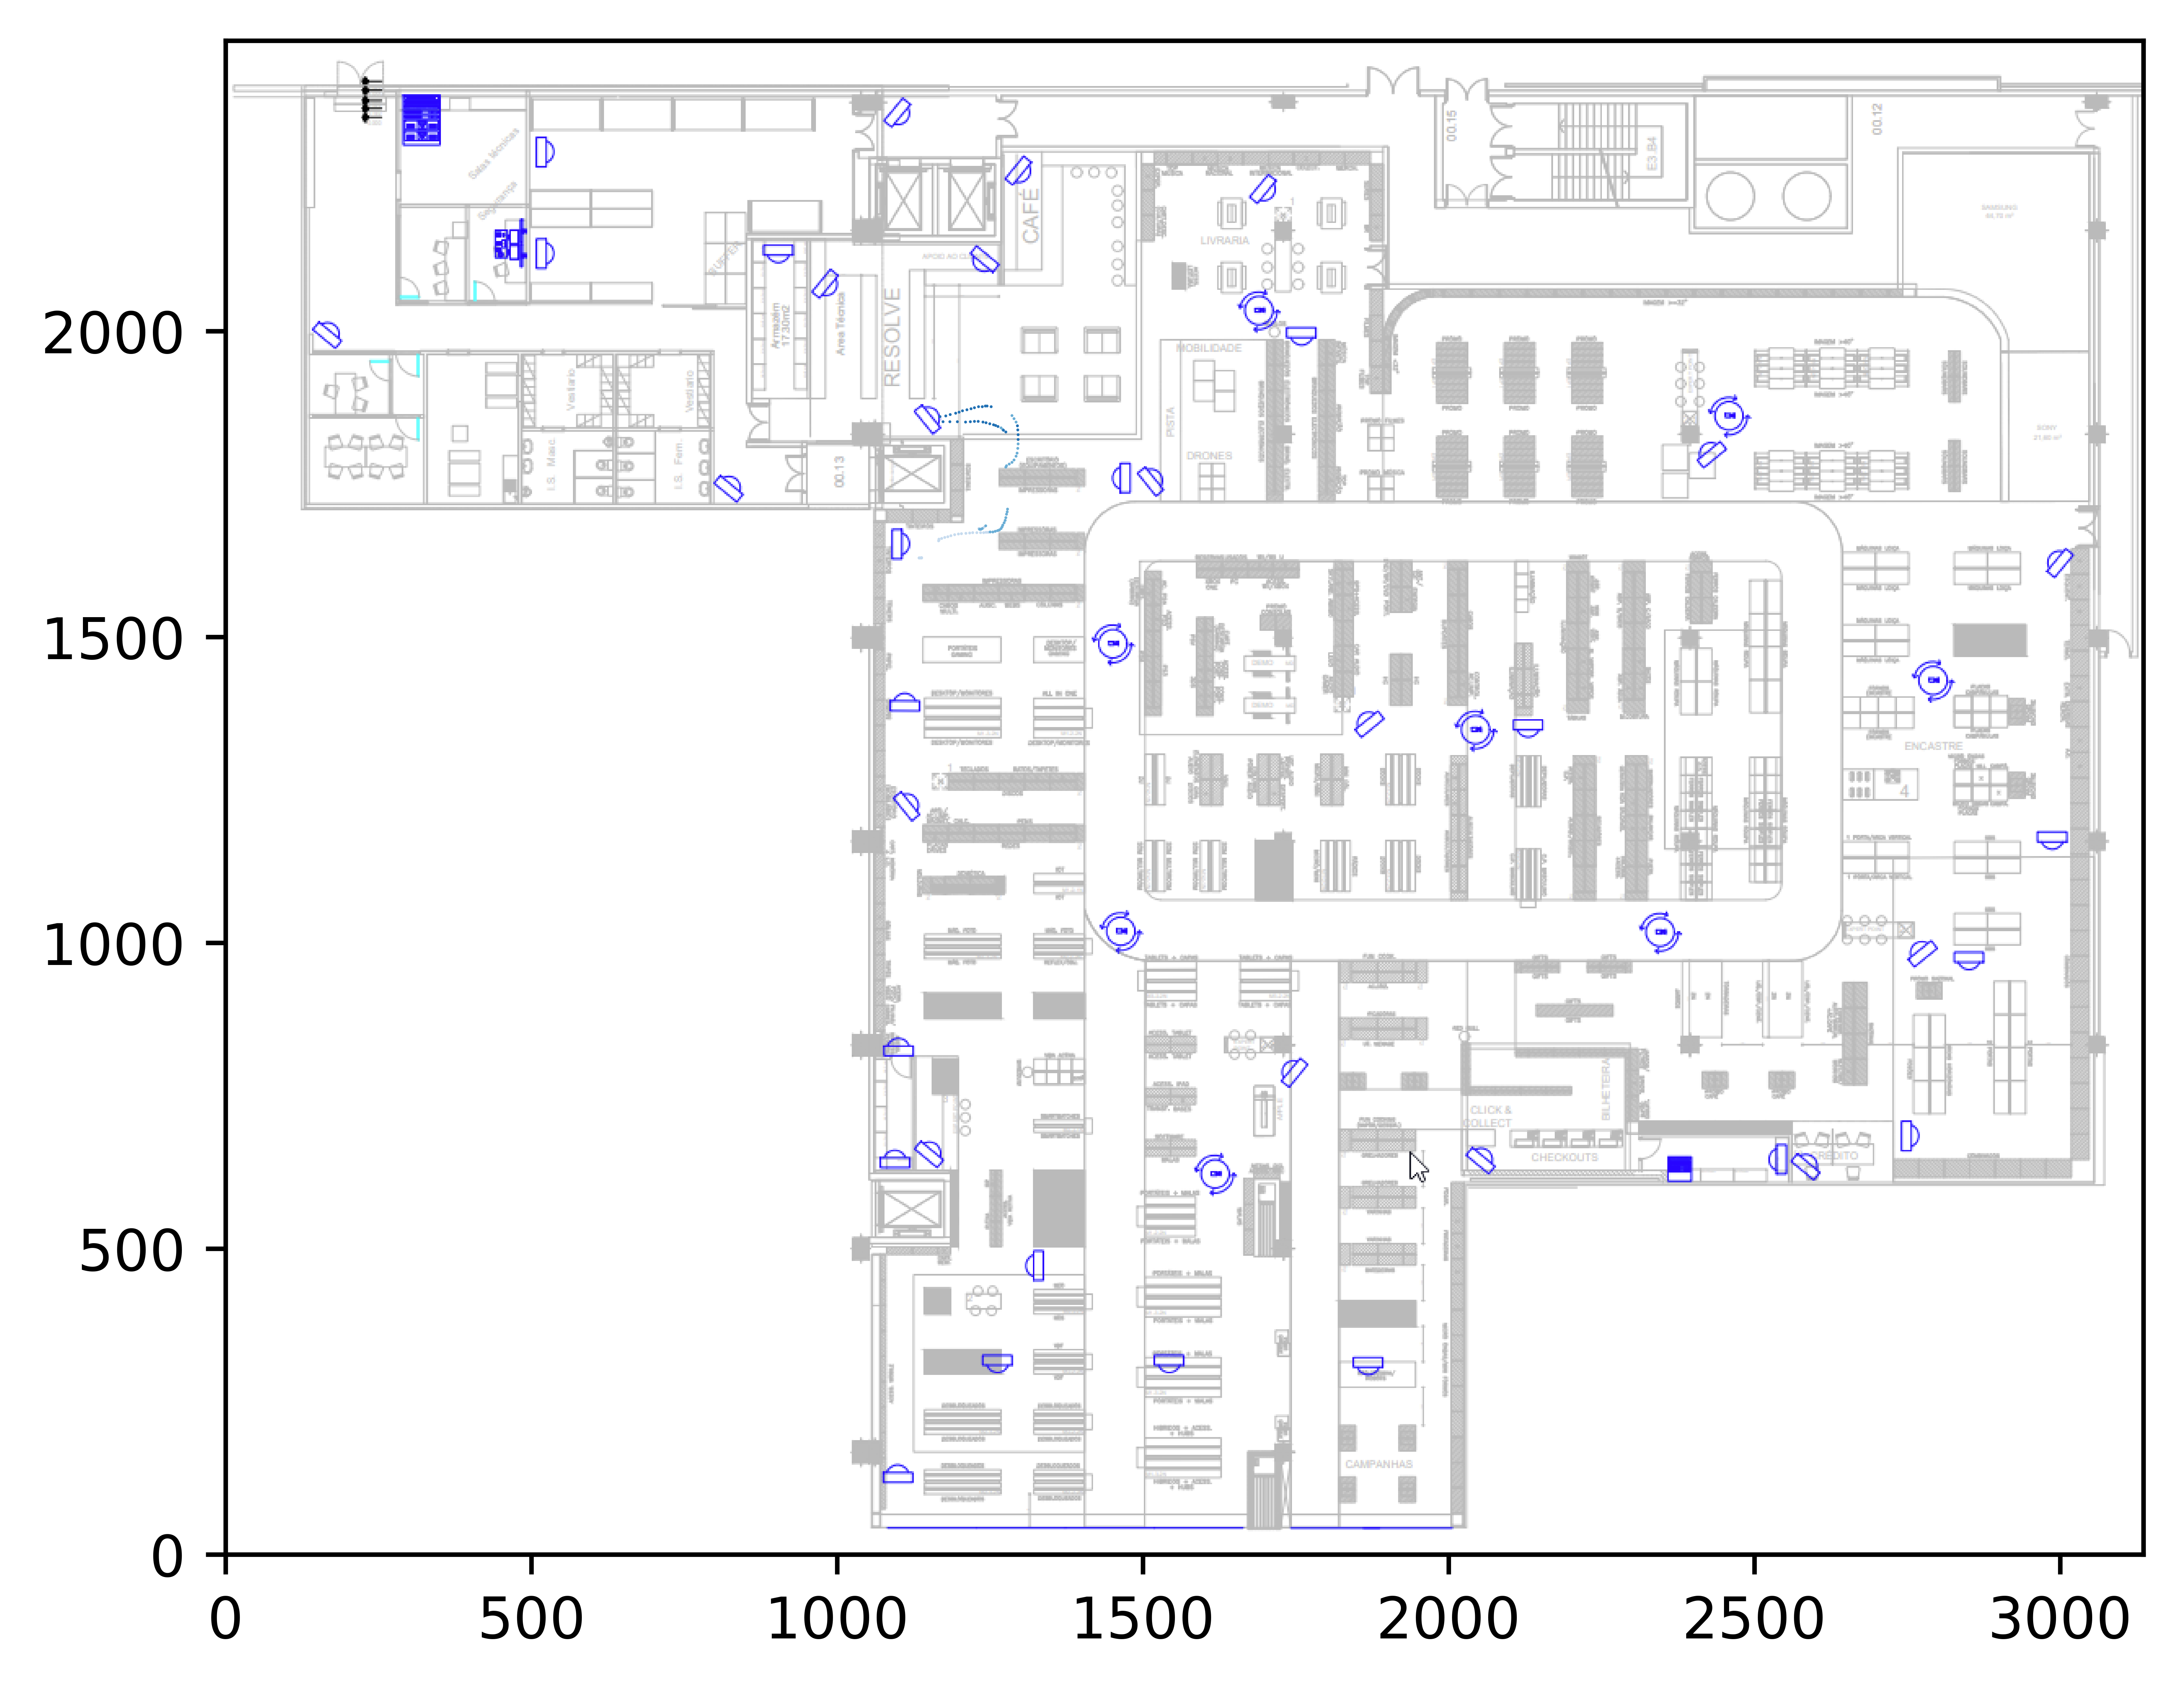

In [14]:
data_by_time = get_data_by_time(df_205, "16:30:27", "16:30:55")
#data_by_customer = get_data_by_customer(df, 1)
print(count_different_customers(data_by_time))
print_trajectory_chronologically(data_by_time)

19
video name: 20220314_1.03_12_16_blurredtime: 16:30:28 bbox coords: (164.2554390421194 445.7511805840205 303.3255151452722 589.9103322899153) camera: 1.03 new_customer_id: 12161188
video name: 20220314_1.03_12_16_blurredtime: 16:30:28 bbox coords: (653.4795253013054 231.74864260985845 733.3948149439718 330.77085465647) camera: 1.03 new_customer_id: 12161192
video name: 20220314_1.03_12_16_blurredtime: 16:30:28 bbox coords: (216.3549911902832 344.79982374612393 358.824460907661 496.8432990903766) camera: 1.03 new_customer_id: 12161191
video name: 20220314_1.03_12_16_blurredtime: 16:30:28 bbox coords: (144.36113895015745 376.7586948954911 287.0110122199717 542.1389957194667) camera: 1.03 new_customer_id: 12161188
video name: 20220314_1.03_12_16_blurredtime: 16:30:28 bbox coords: (234.2743294767921 375.4106505349358 359.41376637831854 504.840086479288) camera: 1.03 new_customer_id: 12161191
video name: 20220314_1.03_12_16_blurredtime: 16:30:28 bbox coords: (151.14105700373614 388.806365

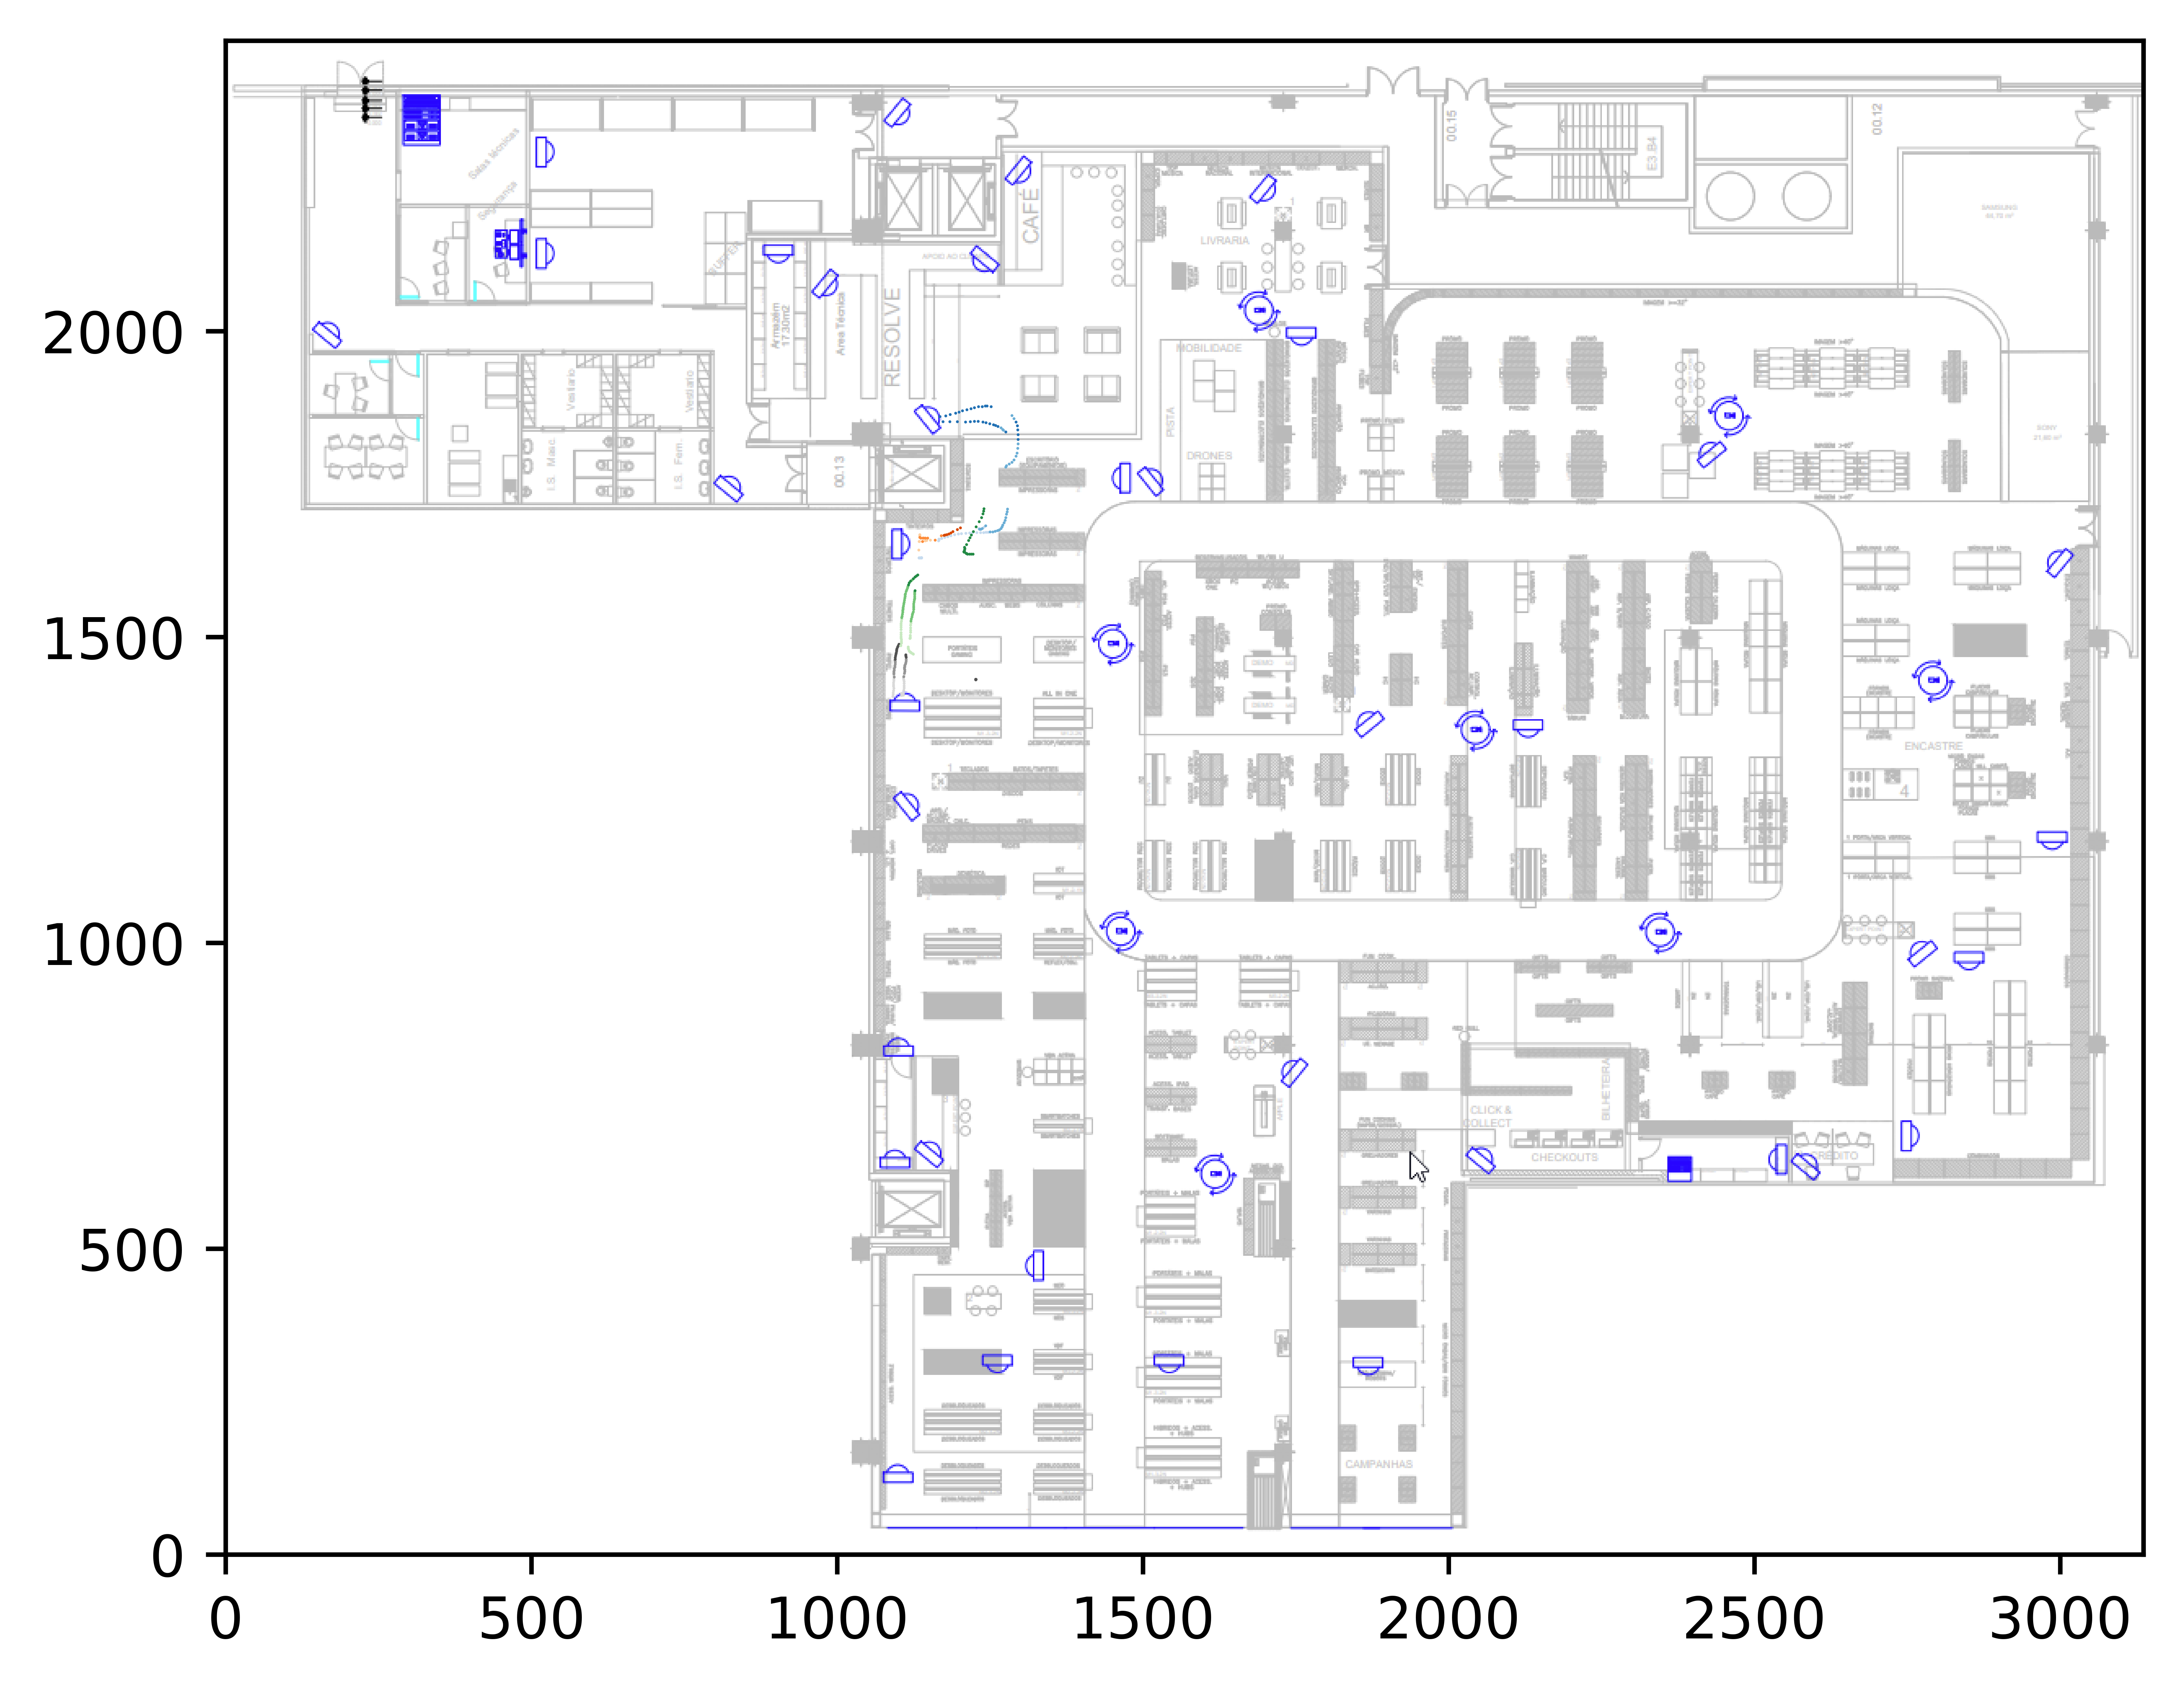

In [15]:
data_by_time = get_data_by_time(df_all, "16:30:27", "16:30:55")
#data_by_customer = get_data_by_customer(df, 1)
print(count_different_customers(data_by_time))
print_trajectory_chronologically(data_by_time)

OTHER EXPERIENCE

5
video name: 20220314_1.04_8_5_blurredtime: 22:24:36 bbox coords: (913.8777071142092 70.00456833624568 942.1654996205788 147.07815994641487) camera: 1.04 new_customer_id: 85989
video name: 20220314_1.04_8_5_blurredtime: 22:24:36 bbox coords: (927.1509474609692 67.91023319932492 956.4237734820229 147.62059480826883) camera: 1.04 new_customer_id: 85989
video name: 20220314_1.04_8_5_blurredtime: 22:24:36 bbox coords: (932.7908144424556 68.4864549075065 962.1813715489744 147.749261204971) camera: 1.04 new_customer_id: 85989
video name: 20220314_1.04_8_5_blurredtime: 22:24:36 bbox coords: (940.1909210464398 68.66603219944548 968.9414957149232 145.28043089926317) camera: 1.04 new_customer_id: 85989
video name: 20220314_1.04_8_5_blurredtime: 22:24:36 bbox coords: (947.9662438713956 69.76326517780711 974.75083662857 140.97069610689) camera: 1.04 new_customer_id: 85989
video name: 20220314_1.04_8_5_blurredtime: 22:24:38 bbox coords: (391.92072200796207 57.44824752807618 432.1369195936004 166.8

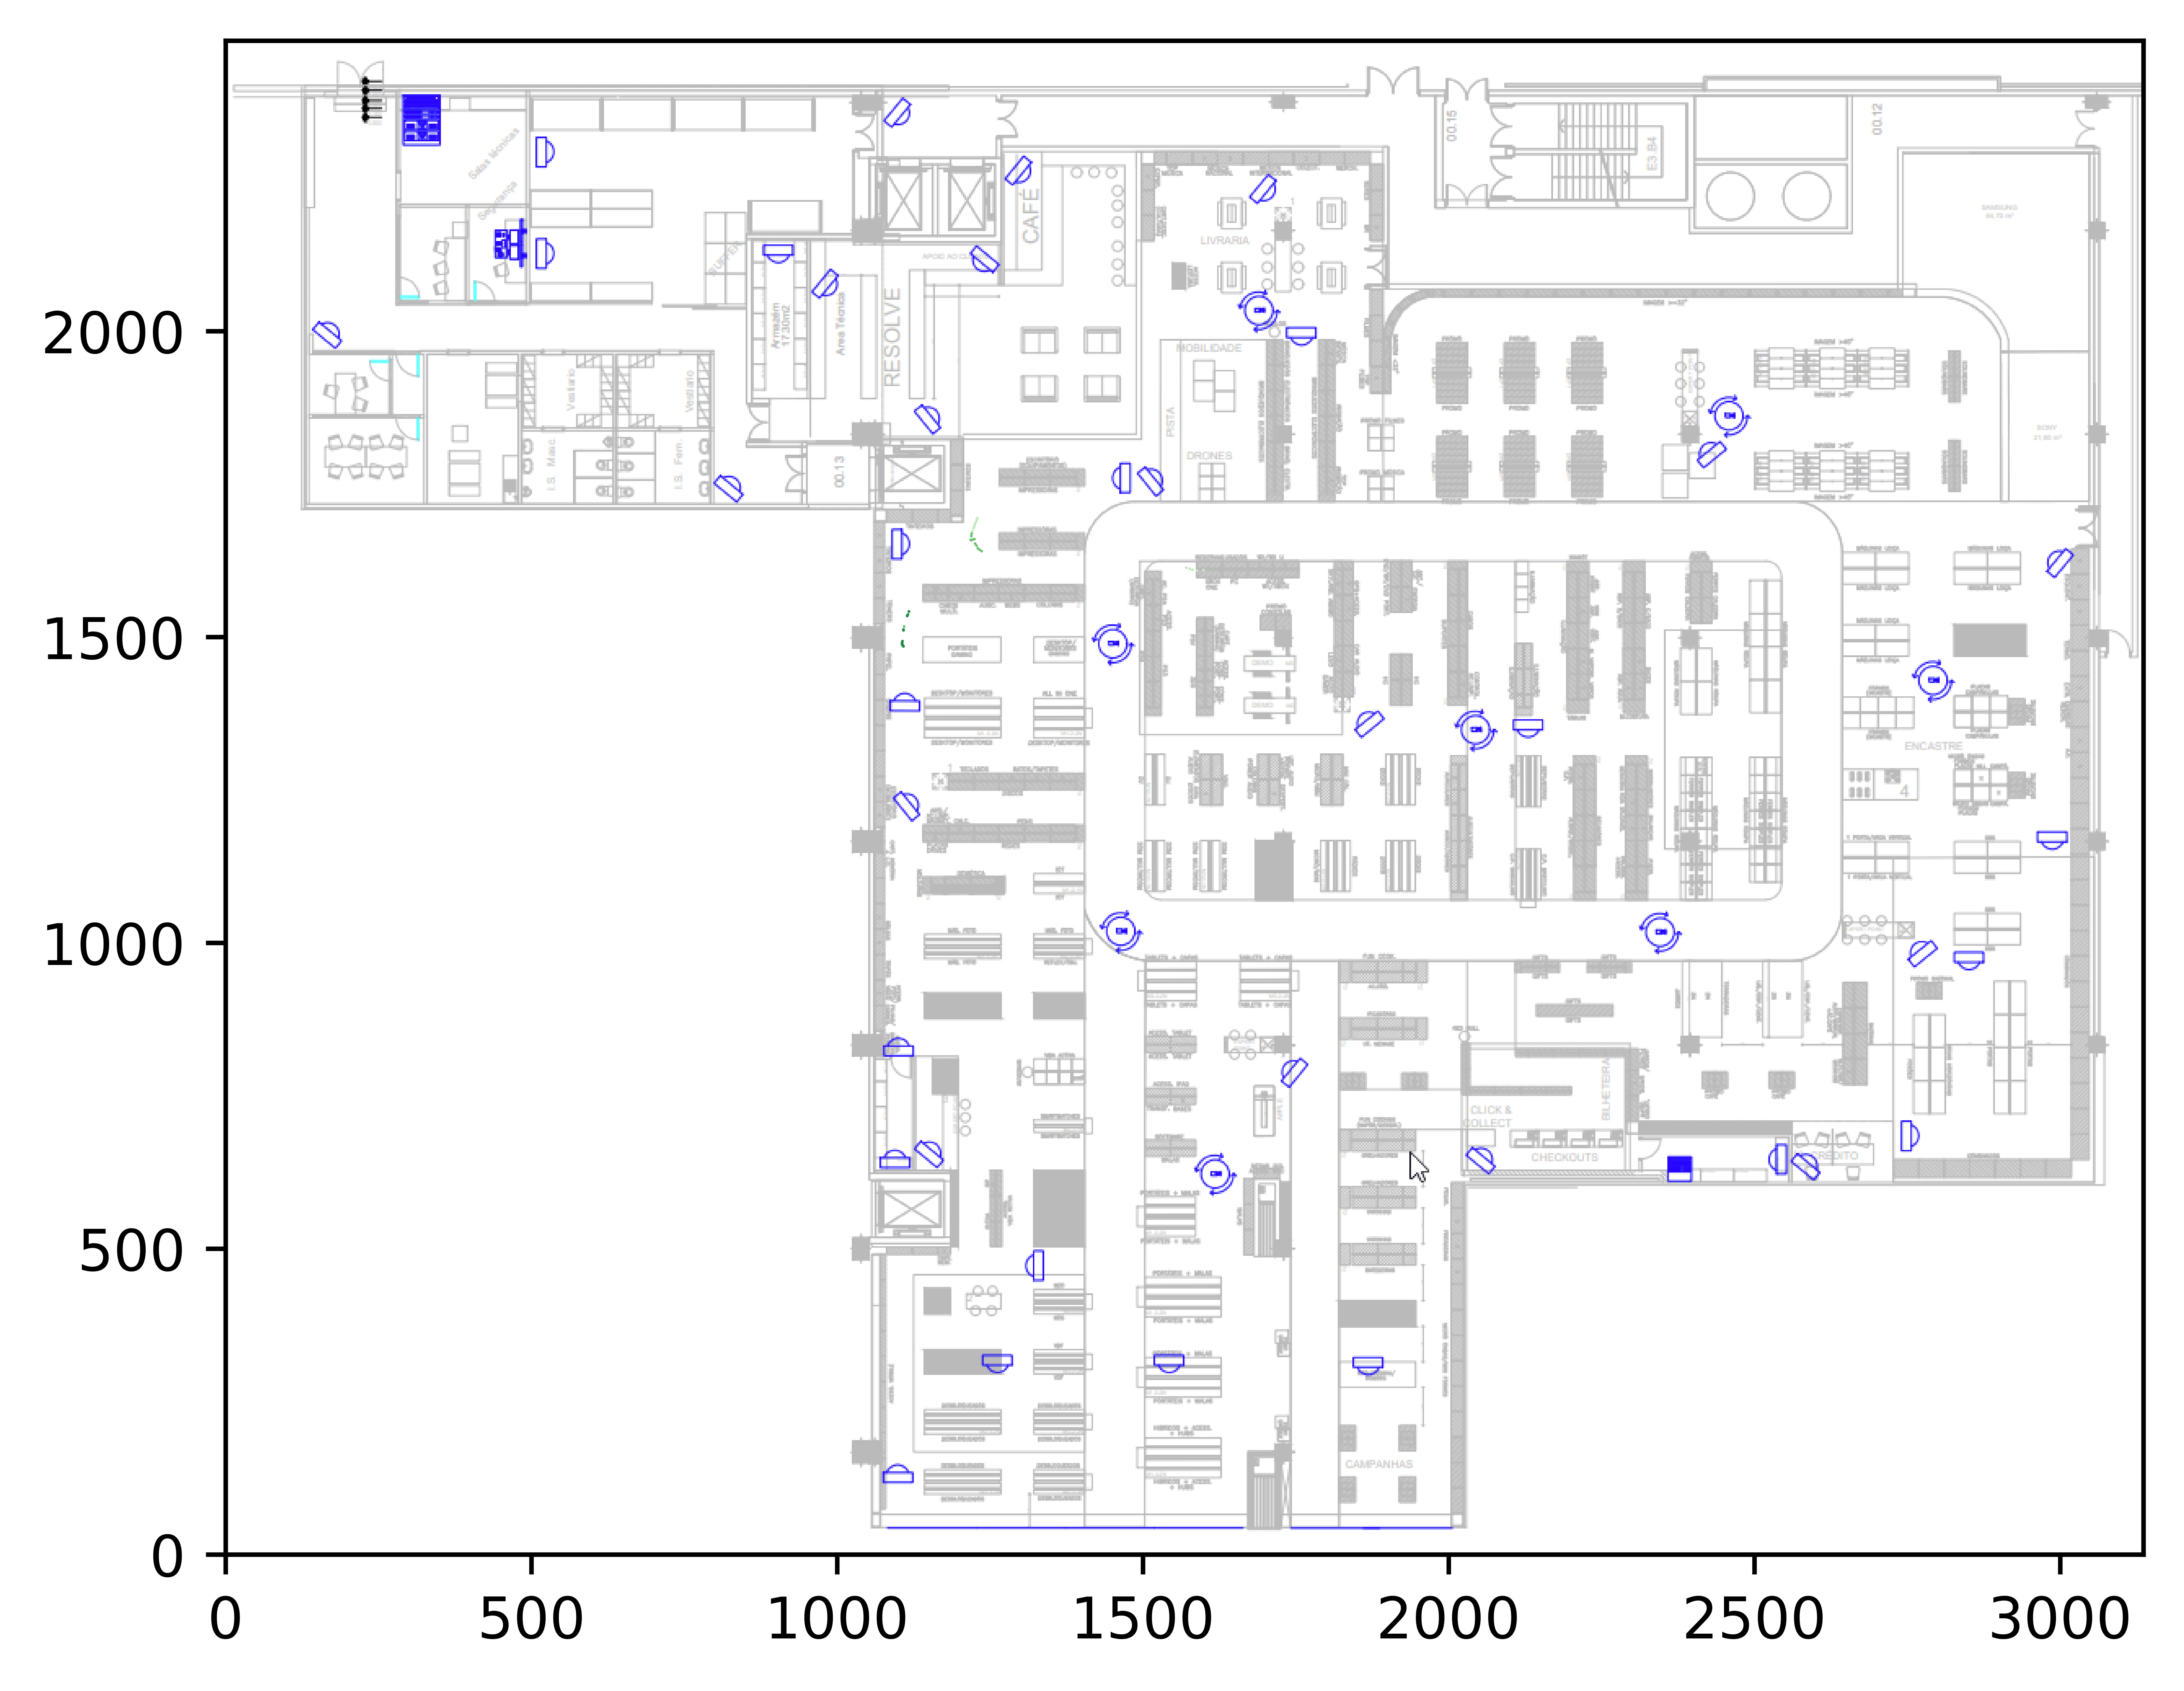

In [16]:
data_by_time = get_data_by_time(df_104, "22:24:35", "22:24:50")
#data_by_customer = get_data_by_customer(df, 1)
print(count_different_customers(data_by_time))
print_trajectory_chronologically(data_by_time)